En esta práctica segmentarás un conjunto de clientes a partir de variables demográficas y de hábitos de compra. El conjunto de datos que utilizarás contiene variables numéricas y categóricas [binarias, ordenadas y no ordenadas].

Asegúrate de aplicar transformaciones a las variables categóricas para convertirlas en numéricas: 
- Representa las variables numéricas con 0 y 1.
- Las variables categóricas ordenadas deben ser representadas con valores enteros que vayan del 0 (para la menor categoría) hasta K-1 (suponiendo que K es el total de categorías).
- Las variables categóricas no ordenadas deben ser representadas con números enteros entre 0 y K-1 (siendo K el total de categorías). La asignación puede ser arbitraria.

Para segmentar a los clientes, aplica alguna técnica de aprendizaje no supervisado [k-means o agrupamiento jerárquico], justificando la elección del total de grupos con algún criterio aceptable.


In [ ]:
# Cargamos las librerias a utilizar
import pandas as pd
import datetime as dt
import numpy as np

In [ ]:
# Cargamos el documento CSV y utilizamos como delimitador el ";"
df = pd.read_csv("customer_data_sub.csv", sep = ';')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,10.0,Low,40.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,30.0
2,466315,Female,Yes,67,Yes,Engineer,10.0,Low,10.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,20.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,60.0


In [ ]:
# Revisamos el total de filas
len(df['ID'].unique())

8068

In [ ]:
# Eliminamos las columnas que tengan el 10% o más con valores Nan
perc = 10.0 
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,Low,40.0
1,462643,Female,Yes,38,Yes,Engineer,Average,30.0
2,466315,Female,Yes,67,Yes,Engineer,Low,10.0
3,461735,Male,Yes,67,Yes,Lawyer,High,20.0
4,462669,Female,Yes,40,Yes,Entertainment,High,60.0


In [ ]:
# Representamos las variables binarias y categoricas secuenciales con valores numéricos
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['Ever_Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Graduated'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Spending_Score'].replace(['Low', 'Average', 'High'], [0, 1, 2], inplace=True)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,462809,0,0.0,22,0.0,Healthcare,0,40.0
1,462643,1,1.0,38,1.0,Engineer,1,30.0
2,466315,1,1.0,67,1.0,Engineer,0,10.0
3,461735,0,1.0,67,1.0,Lawyer,2,20.0
4,462669,1,1.0,40,1.0,Entertainment,2,60.0


In [ ]:
# Revisamos el total de variables diferentes en la columna "Profession"
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [ ]:
# Representamos las variables con datos numericos
# 0 - Doctor
# 1 - Healthcare
# 2 - Engineer
# 3 - Homemaker
# 4 - Artist
# 5 - Entertainment
# 6 - Executive
# 7 - Lawyer
# 8 - Marketing

df['Profession'].replace(['Doctor', 'Healthcare', 'Engineer', 'Homemaker', 'Artist', 'Entertainment', 'Executive', 'Lawyer', 'Marketing'], [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,462809,0,0.0,22,0.0,1.0,0,40.0
1,462643,1,1.0,38,1.0,2.0,1,30.0
2,466315,1,1.0,67,1.0,2.0,0,10.0
3,461735,0,1.0,67,1.0,7.0,2,20.0
4,462669,1,1.0,40,1.0,5.0,2,60.0


In [ ]:
# Ajustamos los datos faltantes de la columna "Profession" con la moda
df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)

# Ajustamos los datos faltantes con la mediana
df = df.fillna(df.median())
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,462809,0,0.0,22,0.0,1.0,0,40.0
1,462643,1,1.0,38,1.0,2.0,1,30.0
2,466315,1,1.0,67,1.0,2.0,0,10.0
3,461735,0,1.0,67,1.0,7.0,2,20.0
4,462669,1,1.0,40,1.0,5.0,2,60.0


In [ ]:
# Revisamos el total de datos faltantes en el dataframe
df.isnull().sum().sum()

0

In [ ]:
# Colocamos el ID de cliente como identificador de cada fila
df = df.set_index(df['ID'])
df = df.drop('ID', axis=1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
ID,,,,,,,
462809,0,0.0,22,0.0,1.0,0,40.0
462643,1,1.0,38,1.0,2.0,1,30.0
466315,1,1.0,67,1.0,2.0,0,10.0
461735,0,1.0,67,1.0,7.0,2,20.0
462669,1,1.0,40,1.0,5.0,2,60.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

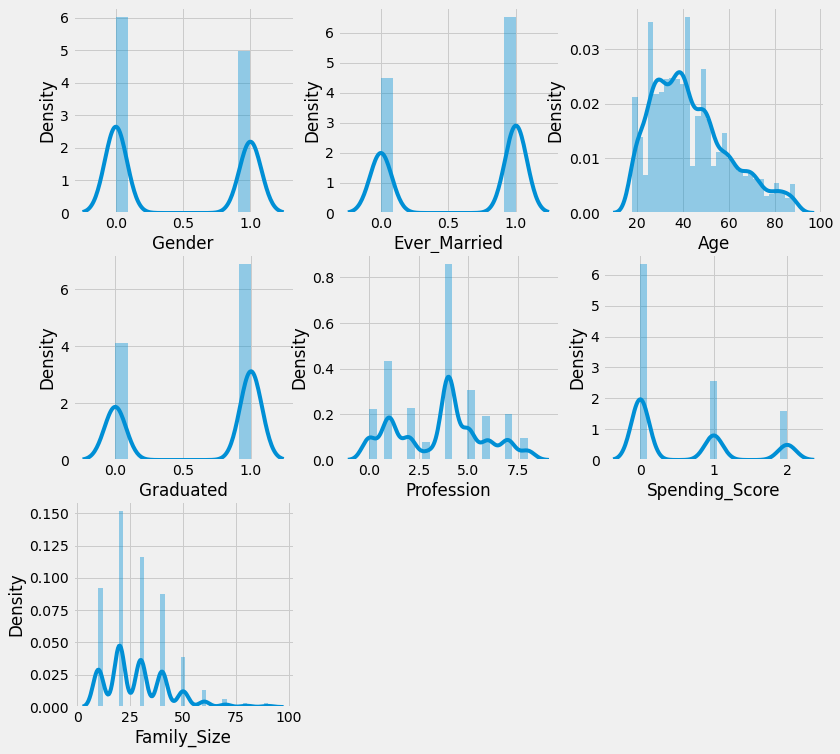

In [ ]:
# Importamos las librerias "seaborn" y "matplotlib.pyplot" para realizar algunas visualizaciones de los datos
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
for i, column in enumerate(df.columns, 1):
  plt.subplot(3,3,i)
  sns.distplot(df[column])

In [ ]:
# Estandarizamos las variables utilizando "sklearn"
from sklearn.preprocessing import StandardScaler

object = StandardScaler()
scale = object.fit_transform(df)

df_norm = pd.DataFrame(scale, columns=['Gender','Ever_Married','Age', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size'])
df_norm

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,-0.909164,-1.206653,-1.284623,-1.29219,-1.193067,-0.736833,0.762698
1,1.099912,0.828738,-0.327151,0.77388,-0.734615,0.612411,0.095802
2,1.099912,0.828738,1.408268,0.77388,-0.734615,-0.736833,-1.237990
3,-0.909164,0.828738,1.408268,0.77388,1.557646,1.961655,-0.571094
4,1.099912,0.828738,-0.207467,0.77388,0.640742,1.961655,2.096491
...,...,...,...,...,...,...,...
8063,-0.909164,-1.206653,-1.284623,-1.29219,0.182290,-0.736833,2.763387
8064,-0.909164,-1.206653,-0.506677,-1.29219,1.099194,-0.736833,0.762698
8065,1.099912,-1.206653,-0.626361,0.77388,-1.193067,-0.736833,-1.237990
8066,1.099912,-1.206653,-0.985413,0.77388,-1.193067,-0.736833,0.762698


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

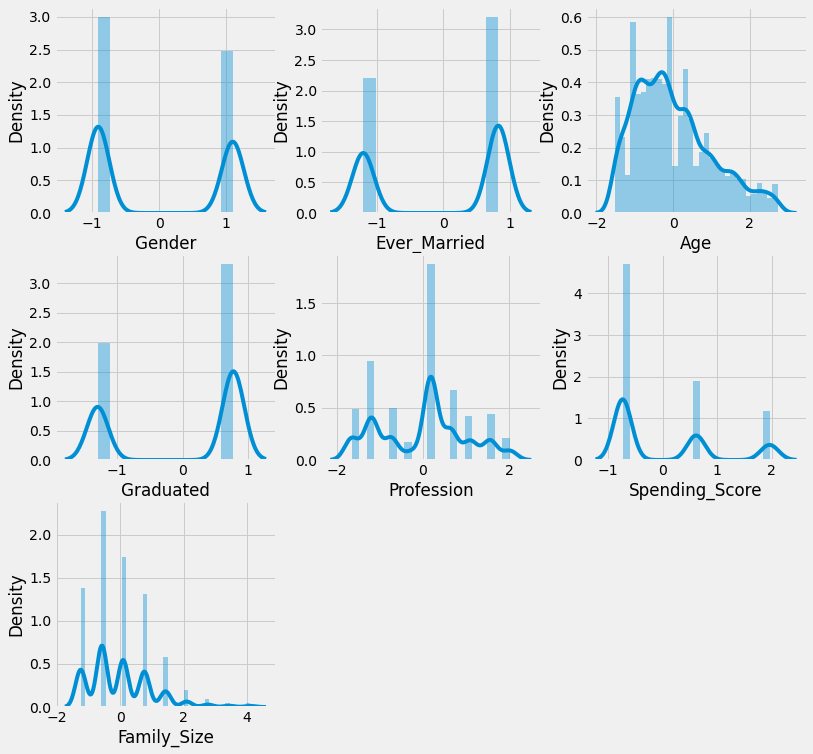

In [ ]:
# Realizamos unas graficas para revisar los datos estandarizados
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
for i, column in enumerate(df_norm.columns, 1):
  plt.subplot(3,3,i)
  sns.distplot(df_norm[column])

## Test with PCA

In [ ]:
# Importamos la libreria "PCA" y la aplicamos al dataframe de los datos estandarizados colocando el total de variables en el campo "n_components"
from sklearn.decomposition import PCA

pca = PCA(n_components=len(df_norm.columns))

pca_seg = pca.fit(df_norm)

In [ ]:
# Revisamos las componentes principales
pd.Series(np.round(pca_seg.components_[0,:],2), index=df_norm.columns)

Gender           -0.08
Ever_Married      0.51
Age               0.52
Graduated         0.23
Profession        0.42
Spending_Score    0.45
Family_Size      -0.17
dtype: float64

In [ ]:
# Verificamos el numero de componentes que necesitamos
pd.Series(np.cumsum(pca_seg.explained_variance_ratio_)*100)

0     35.865450
1     53.885527
2     67.730755
3     79.735853
4     89.120501
5     95.238808
6    100.000000
dtype: float64

In [ ]:
# En este caso trabajamos con 6 componentes principales
pca = PCA(n_components=6)

seg_pca = pca.fit_transform(df_norm)
seg_pca.shape

(8068, 6)

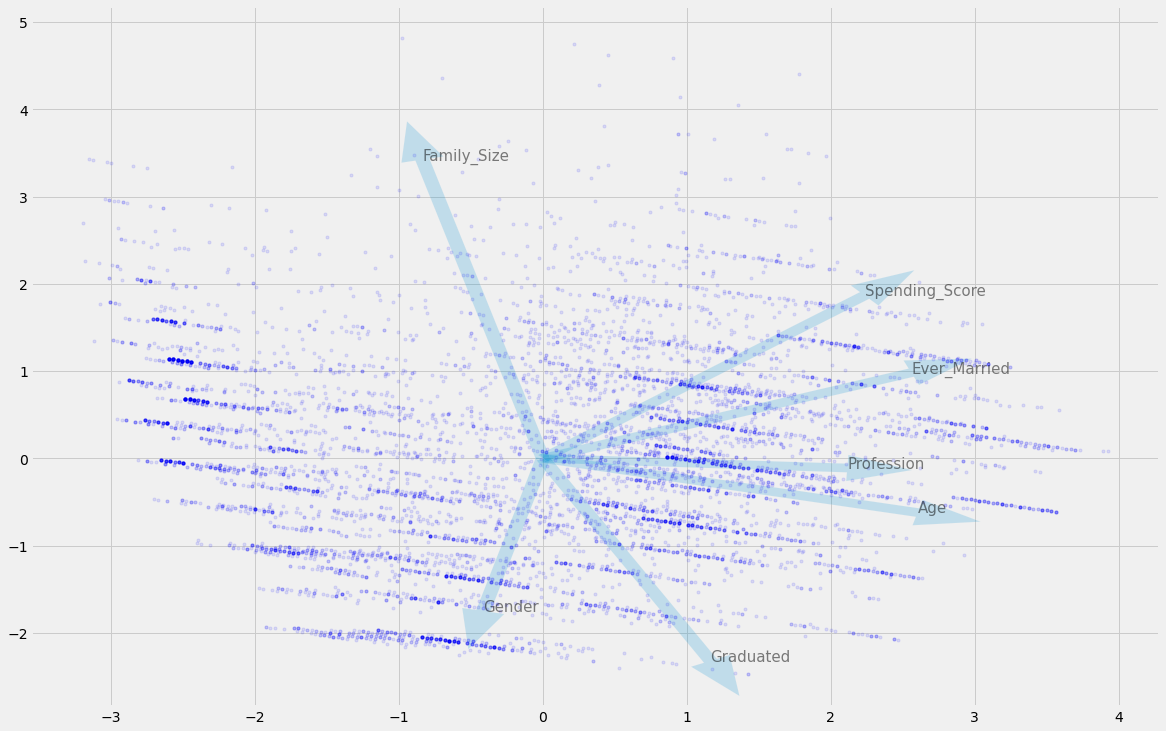

In [ ]:
# Visualizamos los datos y colocamos las flechas de las columnas de acuerdo hacia donde tienden mas los valores de los clientes
fig=plt.figure(figsize=(18,12))
plt.plot(seg_pca[:,0], seg_pca[:,1], 'b.', alpha=0.1)

pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

for i,c in enumerate(df_norm.columns):
  plt.arrow(0,0,5*pc1[i],5*pc2[i], width=0.1, alpha=0.2)
  plt.annotate(c, (5*pc1[i],5*pc2[i]), alpha=0.5, fontsize=15)
plt.savefig("biplot.png")
plt.show()

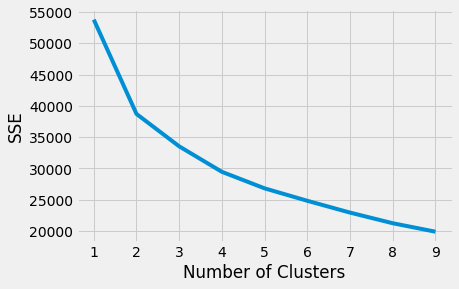

In [ ]:
# Importamos y utilizamos "KMeans" para revisar en cuantos grupos segmentar los datos
from sklearn.cluster import KMeans

sse = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(seg_pca)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Instalamos la libreria "kneed"
!pip install kneed 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importamos y utilizamos "KneeLocator" el cual nos ayuda a encontrar el punto de codo mas optimo a utilizar
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
# En este caso utilizaremos 3 grupos
km = KMeans(n_clusters=3)
grupos = km.fit(seg_pca)

grupos.labels_[:10]

array([0, 2, 1, 2, 2, 2, 1, 1, 1, 2], dtype=int32)

In [ ]:
# Colocamos los valores de las componentes principales y el segmento al que corresponde
seg_pca = pd.DataFrame({"pc1": seg_pca[:,0], "pc2": seg_pca[:,1], "segmento": grupos.labels_})
seg_pca.head()

,pc1,pc2,segmento
0,-2.472482,1.112739,0
1,0.289687,-0.229651,2
2,0.813090,-1.861944,1
3,3.042931,0.254278,2
4,1.201529,1.598889,2


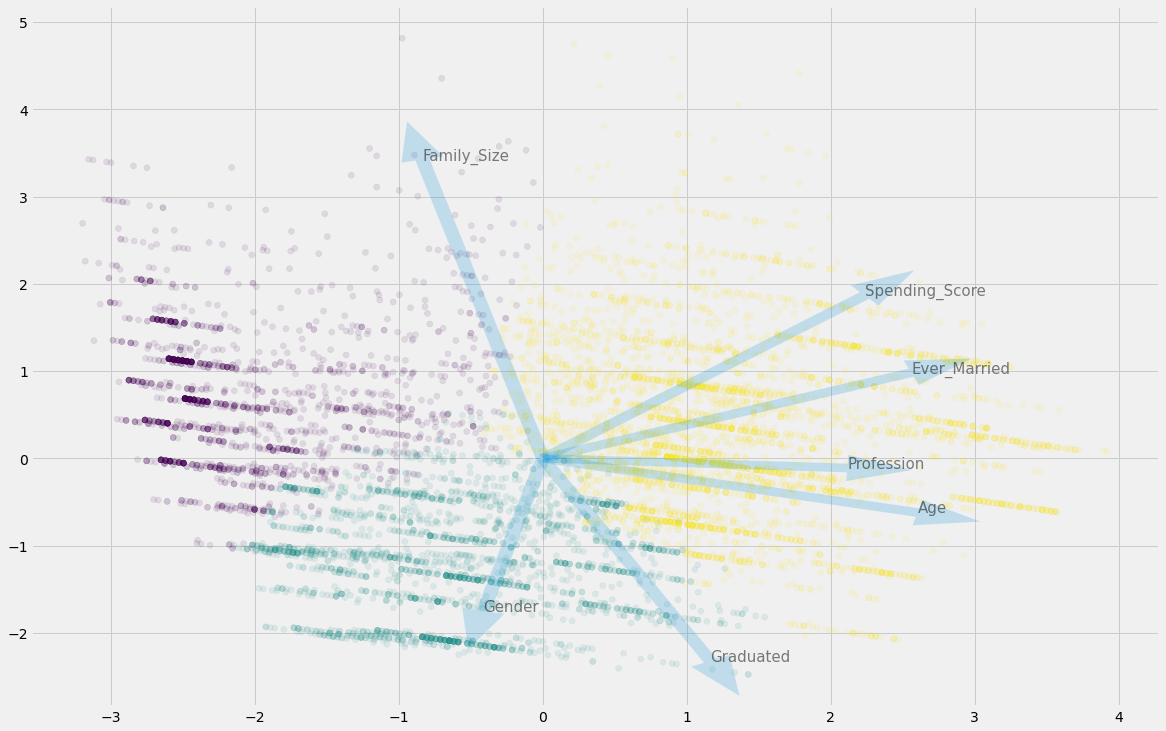

In [ ]:
# Realizamos una visualizacion de los datos pintada por segmentos y colocamos las flechas que indican la columna que tiene mas peso sobre los datos
fig=plt.figure(figsize=(18,12))
plt.scatter(seg_pca["pc1"], seg_pca["pc2"], c=seg_pca["segmento"], alpha=0.1)

pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

for i,c in enumerate(df_norm.columns):
  plt.arrow(0,0,5*pc1[i],5*pc2[i], width=0.1, alpha=0.2)
  plt.annotate(c, (5*pc1[i],5*pc2[i]), alpha=0.5, fontsize=15)

#plt.savefig("segmentacion.png")
plt.show()

In [ ]:
# Revisamos la media de las varianbles principales de cada segmnento
rep_gpo = seg_pca.groupby("segmento").mean()
rep_gpo

,pc1,pc2
segmento,,
0,-2.009782,0.740303
1,-0.591067,-1.177052
2,1.328632,0.345588


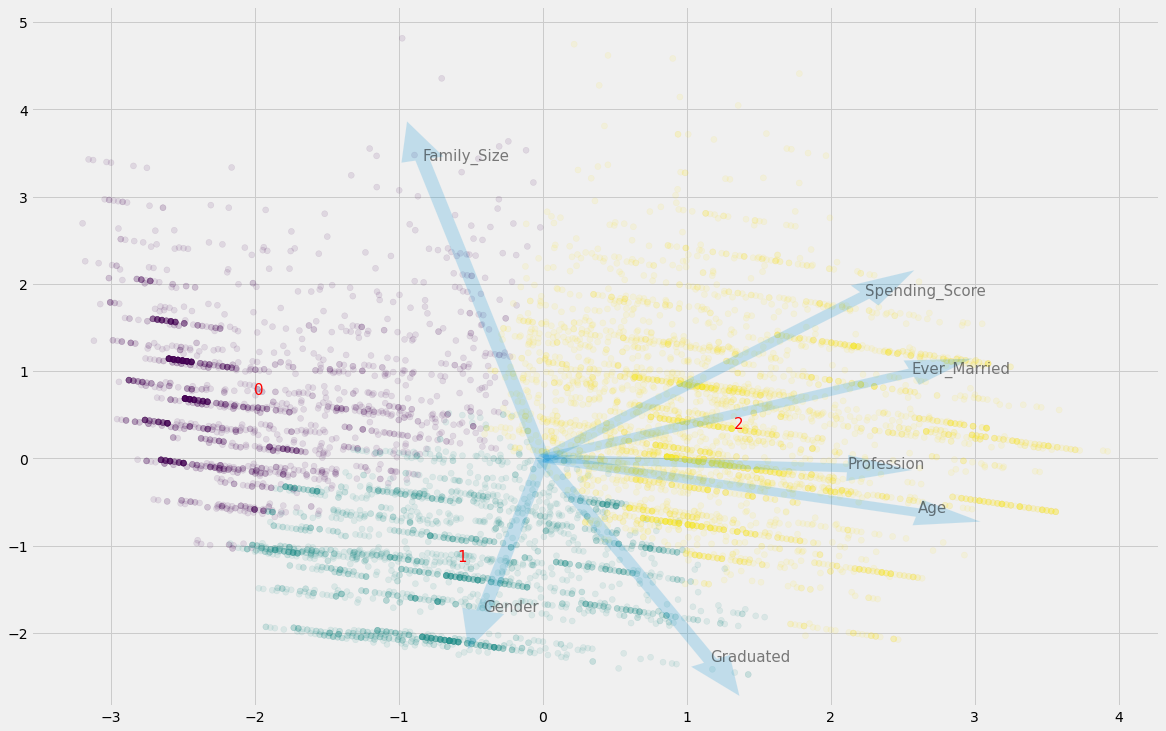

In [ ]:
# Visualizamos los datos con los centroides de lso grupos y los numeramos de acuerdo al segmento al que correspona
fig=plt.figure(figsize=(18,12))

plt.scatter(seg_pca["pc1"], seg_pca["pc2"], c=seg_pca["segmento"], alpha=0.1)

pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

for i,c in enumerate(df_norm.columns):
  plt.arrow(0,0,5*pc1[i],5*pc2[i], width=0.1, alpha=0.2)
  plt.annotate(c, (5*pc1[i],5*pc2[i]), alpha=0.5, fontsize=15)

for i in range(len(rep_gpo)):
  g = rep_gpo.iloc[i]
  plt.annotate(str(i),(g["pc1"], g["pc2"]), color="r", fontsize=15) 

#plt.savefig("segmentacion.png")
plt.show()

In [ ]:
# Colocamos los valores en terminos de las variables originales y mostramos la media de cada segmento de acuerdo a cada variable
df["segmento"] = grupos.labels_
df.groupby("segmento").mean().transpose()

segmento,0,1,2
Gender,0.449947,0.617774,0.354855
Ever_Married,0.124068,0.294219,0.998967
Age,26.900958,39.538395,53.853564
Graduated,0.147497,0.877912,0.706095
Profession,1.865815,3.376186,4.580062
Spending_Score,0.050586,0.013805,1.105114
Family_Size,41.203408,18.425367,28.502066


## Principal sin PCA

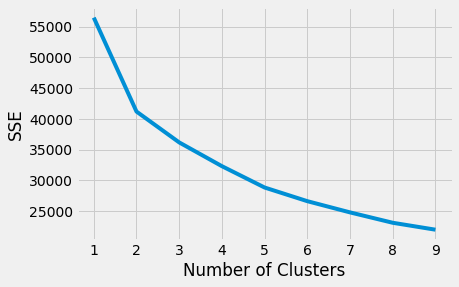

In [ ]:
# Importamos y utilizamos "KMeans" para revisar en cuantos grupos segmentar los datos
from sklearn.cluster import KMeans

sse = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scale)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Importamos y utilizamos "KneeLocator" el cual nos ayuda a encontrar el punto de codo mas optimo a utilizar
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
# En este caso utilizaremos 3 grupos
km = KMeans(n_clusters=3)
grupos = km.fit(scale)

grupos.labels_[:10]

array([2, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

In [ ]:
# Colocamos los segmentos en las variables originales
df_norm["segmento"] = grupos.labels_
df_norm

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,segmento
0,-0.909164,-1.206653,-1.284623,-1.29219,-1.193067,-0.736833,0.762698,2
1,1.099912,0.828738,-0.327151,0.77388,-0.734615,0.612411,0.095802,1
2,1.099912,0.828738,1.408268,0.77388,-0.734615,-0.736833,-1.237990,0
3,-0.909164,0.828738,1.408268,0.77388,1.557646,1.961655,-0.571094,1
4,1.099912,0.828738,-0.207467,0.77388,0.640742,1.961655,2.096491,1
...,...,...,...,...,...,...,...,...
8063,-0.909164,-1.206653,-1.284623,-1.29219,0.182290,-0.736833,2.763387,2
8064,-0.909164,-1.206653,-0.506677,-1.29219,1.099194,-0.736833,0.762698,2
8065,1.099912,-1.206653,-0.626361,0.77388,-1.193067,-0.736833,-1.237990,0
8066,1.099912,-1.206653,-0.985413,0.77388,-1.193067,-0.736833,0.762698,0


In [ ]:
# Mostramos la media de cada segmento de acuerdo a cada variable
rep_gpo = df_norm.groupby("segmento").mean()
rep_gpo

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
segmento,,,,,,,
0,0.396643,-0.736659,-0.279035,0.509682,-0.136771,-0.725041,-0.657600
1,-0.200049,0.824728,0.598293,0.186628,0.433422,0.689178,-0.033799
2,-0.027318,-0.952507,-0.993701,-1.017315,-0.797358,-0.666207,0.854333


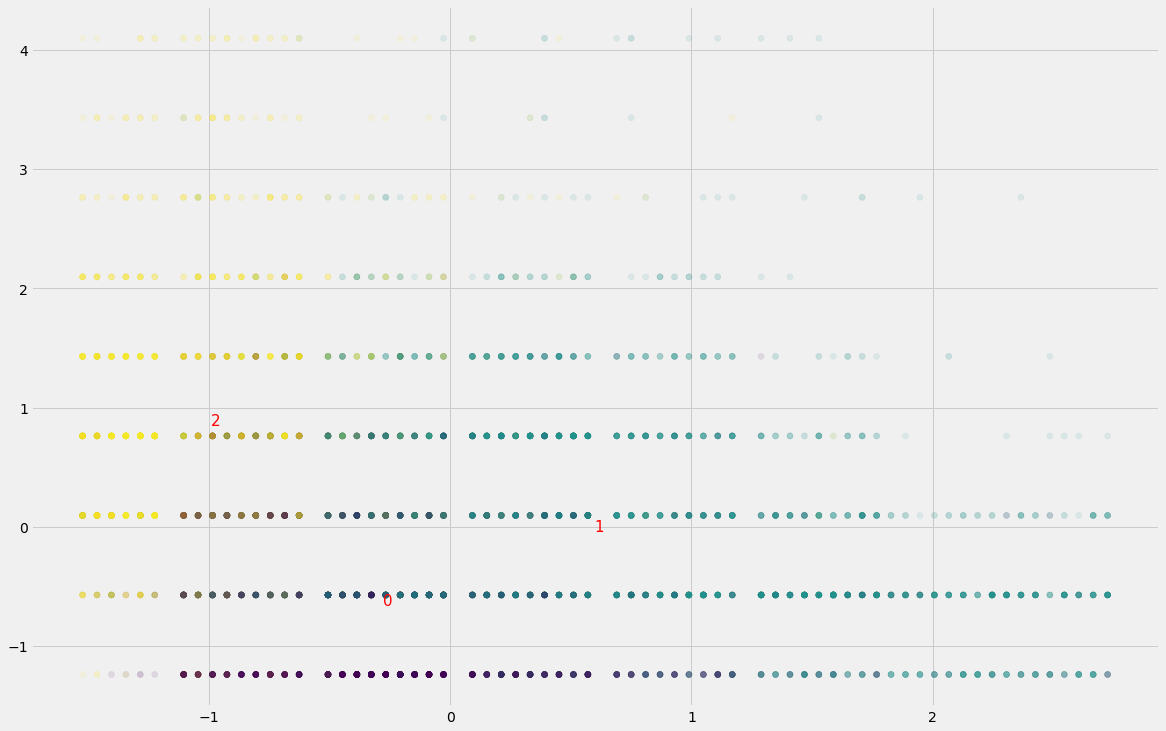

In [ ]:
# Visualizamos los datos con colores de acuerdo al segmento, con relacion a la edad, al tamaño de la familia y numeramos los segmentos
fig=plt.figure(figsize=(18,12))

plt.scatter(df_norm["Age"], df_norm["Family_Size"], c=df_norm["segmento"], alpha=0.1)

for i in range(len(rep_gpo)):
  g = rep_gpo.iloc[i]
  plt.annotate(str(i),(g["Age"], g["Family_Size"]), color="r", fontsize=15) 

#plt.savefig("segmentacion.png")
plt.show()

En conclusión, con los datos proporcionados, podemos definir 3 sgmentos o grupos los cuales se relacionan de la siguiente forma:
- El segmento 0 es mas dependiente al tamaño de la familia, principalmente orientado para personas jovenes entre los 26 años, no graduados. 
- El segmento 1 es mas dependiente al genero, con mayor inclinacion a las  mujeres, con un puntaje de gasto bajo, una edad entre los 40 años y no casados.
- El segmento 2 es mas dependiente a tener un puntaje de gasto alto, estan casados y son los de mayor edad entre los 54 años.